# **Traffic Sign Recognition** 

## Writeup

---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup

#### 1. Provide a Writeup that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/yuan-ji/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 12630
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 1)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.
Here is an exploratory visualization of the data set. It is a bar chart showing how the data is distributed. The distribution is similar in train，valid and test Set. The count of each traffic sign is not same in each data set. For instance, the sign "Speed limit (30km/h)" is much more than the sign "Speed limit(20km/h)".

![](writeup_images/data_set.png)

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale because color doesn't play a important role for classification. The signs can be identified in grayscale as well. On one hand, grayscaling can reduce the noise from color. On the other hand, grayscale photo has just on deep. After grayscaling the amout of input is significantly reduced.


Here is an example of a traffic sign image before and after grayscaling.

![](writeup_images/test_grayscale.png)

As a last step, I normalized the image data. Because after normalization all data are on the same scale. After this, things make no difference in the meaning of the symbol. 

I decided to generate additional data because the size of training now is relativ small. To avoid overfitting, I want more traing data.

To add more data to the the data set, I used the following techniques.

1. shear the image
2. rotate the image in random angle
3. change the exposure of image
4. shift the image 
5. zoom the image 

I used the keras and numpy to realize thses distortion of images. I used on of these distortion for the original images. It depands on a random value "lot". For each image, only one operation will be chossen randomly. 

Here is an example of an original image and an augmented image:

![](writeup_images/augmentation.png)


#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

|          Layer          |  Input   |  Output  | Description              |
| :---------------------: | :------: | :------: | :----------------------- |
|      Convolution1       | 32x32x1  | 28x28x32 | 1x1 strid, Valid padding |
|          Relu           |          |          |                          |
|       Max Pooling       | 28x28x32 | 14x14x32 | 2x2 strid, Valid padding |
|      Dropout Layer      |          |          | Keep prob = 0.5          |
|      Convolution 2      | 14x14x32 | 10x10x64 | 2x2 strid, Valid padding |
|          Relu           |          |          |                          |
|       Max Pooling       | 10x10x64 |  5x5x64  | 2x2 strid, Valid padding |
|      Dropout Layer      |          |          | Keep prob = 0.5          |
| Fully Connected Layer 0 |  5x5x64  |   1600   |                          |
| Fully Connected Layer 1 |   1600   |   120    |                          |
|          Relu           |          |          |                          |
|      Dropout Layer      |          |          |                          |
| Fully Connected Layer 2 |   120    |    84    |                          |
|          Relu           |          |          |                          |
| Fully Connected Layer 3 |    84    |    43    | Output Layer             |


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an the following parameters:

- Batch size: 256
- Epochs:25
- Initial learing rate: 0.001
- Optimizer: AdamOptimizer 

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of 0.953
* validation set accuracy of 0.962
* test set accuracy of 0.946

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
    * I first used the origin lenet, which I learned in the Udcity It's simple and classic.
* What were some problems with the initial architecture
    * The output is different. The origin Lenet is for MNIST, output was 10. But Traffic sign has 43 output. 

* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
    * First the accuracy is realtive low, it was about 0.91. In order to improve the accuracy, I added the depth for converlution layer. For exampl, the output of converlution layer 1 was 28x28x6, namely the depth is just 6. I change it to 28x28x32. I also increase the depth on output of following layer.
    * After that, the accuracy is better. But it seems to be over fitting. So I added dropout layer too. It look good. Pooling layer and dropout layer works well. The accuracy is similar on the train dataset and valid dataset.
* Which parameters were tuned? How were they adjusted and why?
    * I change the Batch size and Epochs. By incresing the batch size epoch, the test accuracy becomes better. But if batch size and epochs is too large, the accuracy will not change so much. So I finally choose the the number Epochs: 25 and Batch Size: 256. 
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model
    * Dropout help with preventing overfitting. So the model becomes better.

If a well known architecture was chosen:
* What architecture was chosen?
* Why did you believe it would be relevant to the traffic sign application?
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

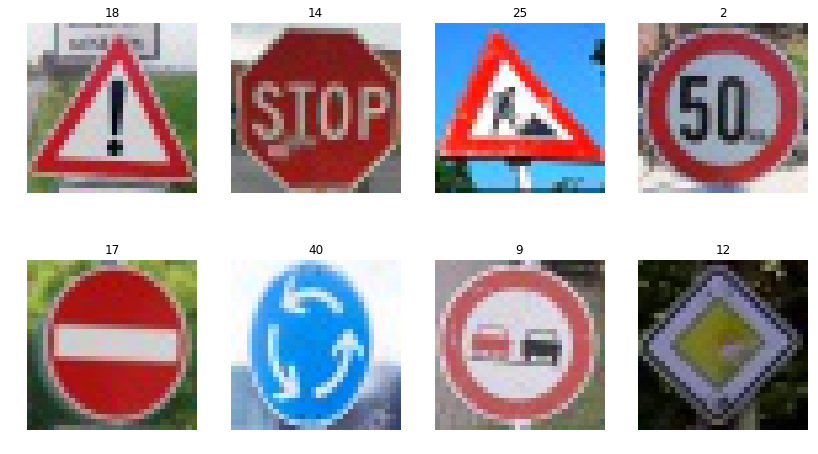

The first image might be difficult to classify because ...

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| U-turn     			| U-turn 										|
| Yield					| Yield											|
| 100 km/h	      		| Bumpy Road					 				|
| Slippery Road			| Slippery Road      							|


The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of ...

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)


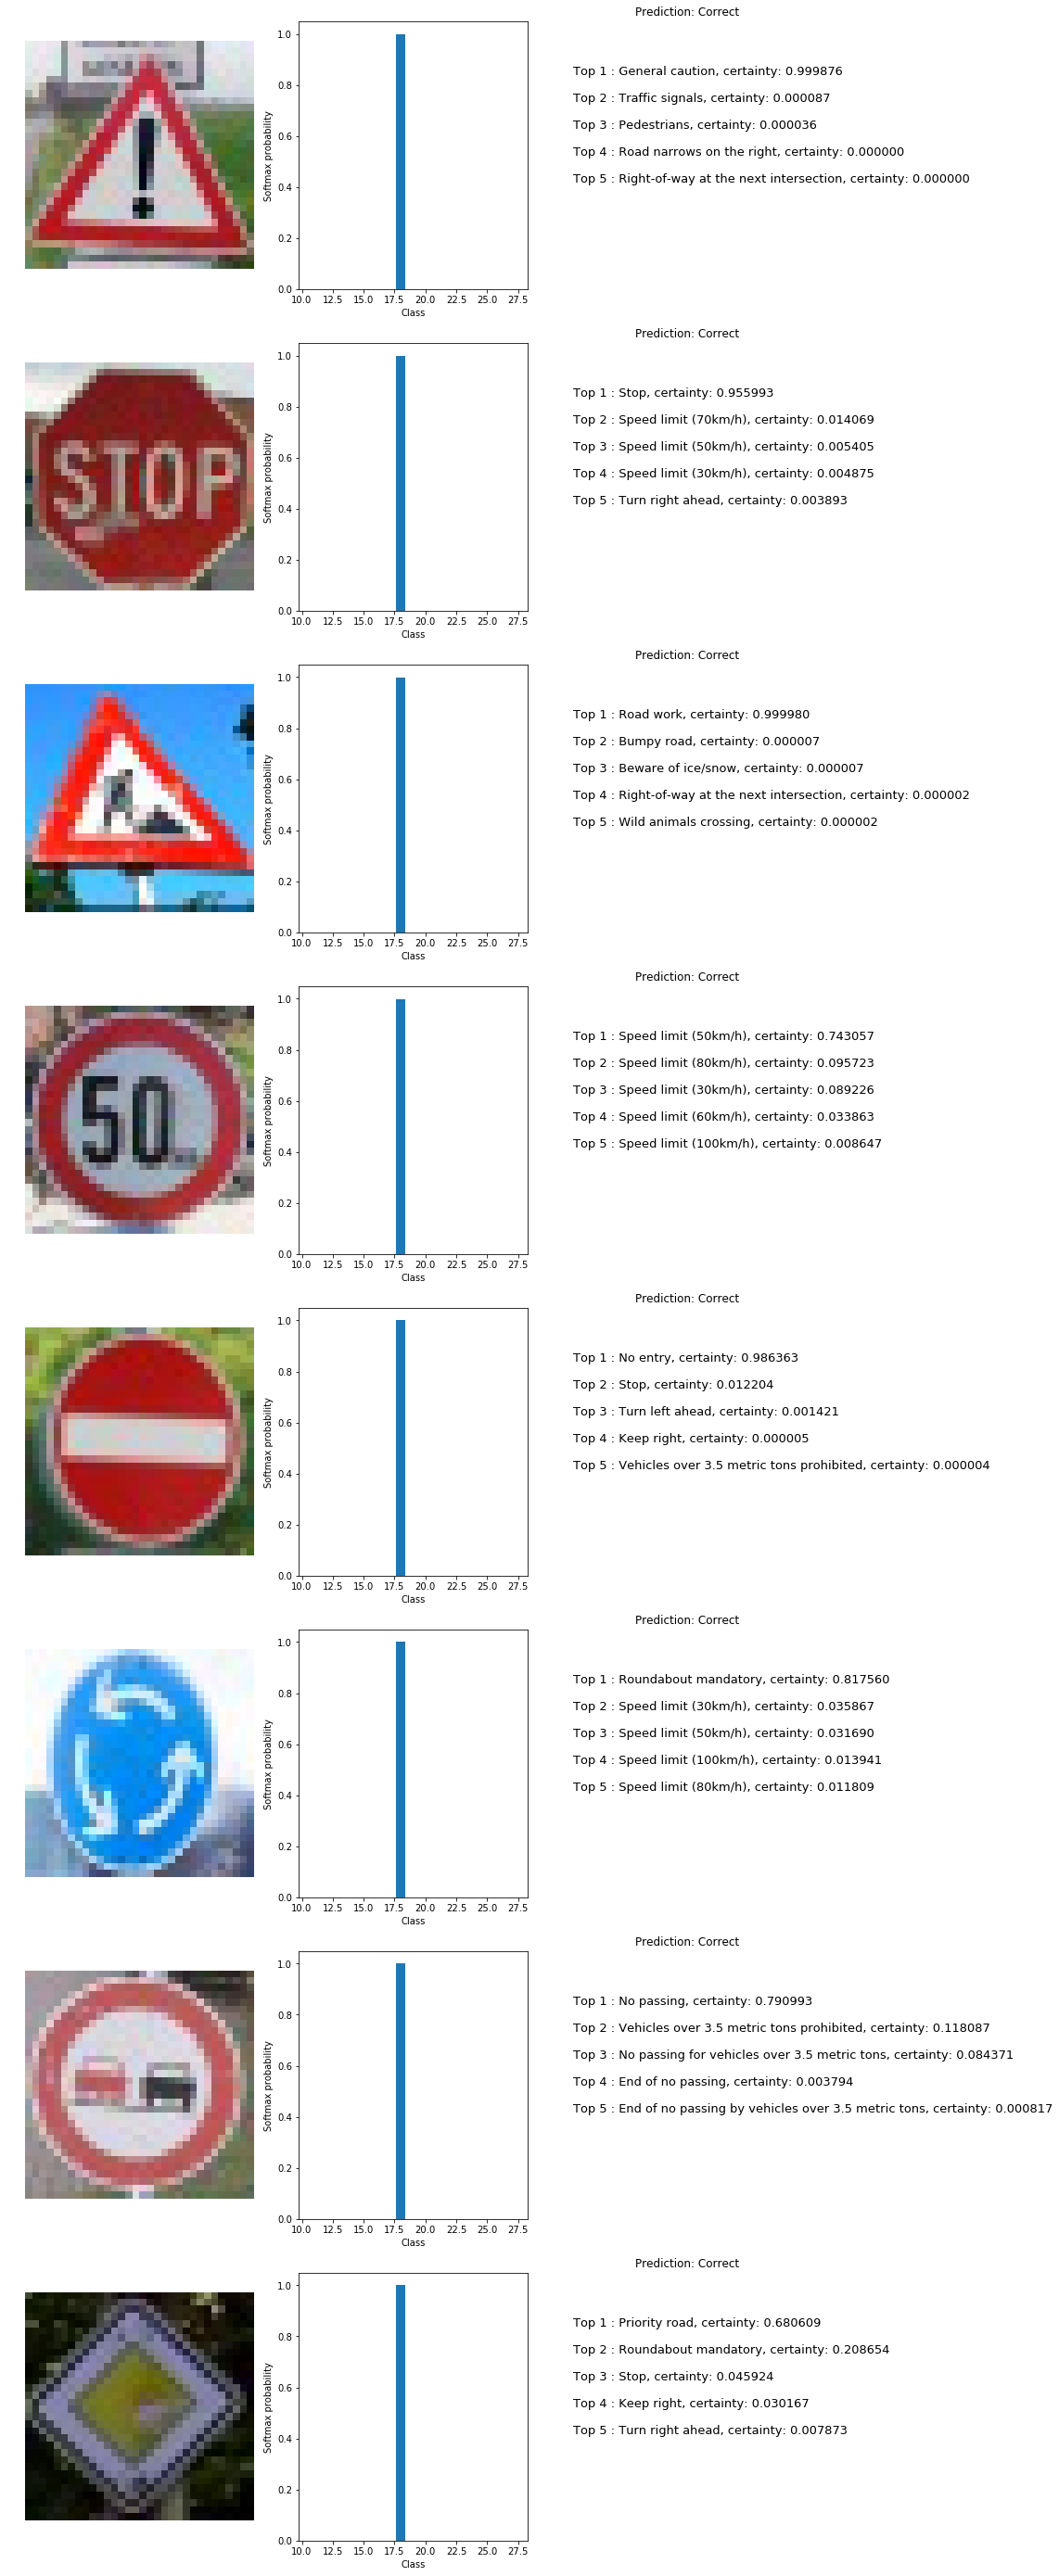


The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.



For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .60         			| Stop sign   									| 
| .20     				| U-turn 										|
| .05					| Yield											|
| .04	      			| Bumpy Road					 				|
| .01				    | Slippery Road      							|


For the second image ... 

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?


